# DATA CLEANING

In [1]:
%matplotlib inline  
# !pip install matplotlib

import pandas as pd
import numpy as np
import pandas_highcharts.core
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot 

import os


os.environ.setdefault("DJANGO_SETTINGS_MODULE", "IMAM.settings")

from django.conf import settings
from home.management.commands.load_data import assign_state_lga_num, rename_cols, generic_cleaning, merge_in_and_outpatients, add_program_reports_from_supervision

import django
django.setup()

from home.models import Site

In [40]:
engine = create_engine(
    'postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{NAME}'.format(**settings.DATABASES['default']))
df_raw = pd.read_sql_query("select * from program;", con=engine)

In [41]:
df_raw

,id,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,...,last_seen_weeknum,rep_year_wn,rep_weeknum,last_seen_dotw,last_seen_hour,year_weeknum,iso_rep_year_wn,iso_year_weeknum,iso_diff,since_x_weeks
0,452571170,93961466-0aa3-4045-a630-ec8078b1a054,tel:+2348140190192,Sale Ibrahim.,None,3511110018,2017-03-30 20:51:29.051413,2017-03-30 21:02:01.503834,13,Site,...,None,None,None,None,None,None,None,None,0,3
1,452571122,bdc53cb8-af42-4817-bce2-8edc619bbaac,tel:+2348109242538,Binta Sada.,None,2001110030,2017-03-30 20:41:33.359242,2017-03-30 20:50:58.917683,8,Site,...,None,None,None,None,None,None,None,None,-5,8
2,462717990,93961466-0aa3-4045-a630-ec8078b1a054,tel:+2348140190192,Sale Ibrahim.,None,3511110018,2017-04-21 15:34:04.386709,2017-04-21 15:42:19.884021,16,Site,...,None,None,None,None,None,None,None,None,0,0
3,462717714,94c77224-e7cb-4852-a5dc-6d5b71d78275,tel:+2349035066677,Abubakar Sani.,None,2118110015,2017-04-21 15:26:41.645834,2017-04-21 15:35:00.462024,15,Site,...,None,None,None,None,None,None,None,None,-1,1
4,462717157,b0719519-422d-4dab-8780-39ced26d332d,tel:+2348060342109,Sa'adatu Yahaya.,None,805110005,2017-04-21 15:12:40.865349,2017-04-21 15:32:21.854965,15,Site,...,None,None,None,None,None,None,None,None,-1,1
5,462570121,9ea2e3f9-dd78-4e1e-be89-ac8a30146875,tel:+2348038279551,Saidu Danlami.,None,1818110011,2017-04-21 08:41:25.868320,2017-04-21 14:52:12.704722,16,Site,...,None,None,None,None,None,None,None,None,0,0
6,462715743,da892aed-cd24-4c0c-adb0-d4473f77d3ab,tel:+2348025111342,Theresa Pwadadi Wilson.,None,209110005,2017-04-21 14:41:29.852018,2017-04-21 14:49:22.495220,14,Site,...,None,None,None,None,None,None,None,None,-2,2
7,462715578,94c77224-e7cb-4852-a5dc-6d5b71d78275,tel:+2349035066677,Abubakar Sani.,None,2118110015,2017-04-21 14:38:49.721652,2017-04-21 14:49:17.529133,13,Site,...,None,None,None,None,None,None,None,None,-3,3
8,462715629,fe819894-75b7-4406-b205-183f873ec621,tel:+2348066191331,Dahiru Sani.,None,3317110011,2017-04-21 14:39:28.583610,2017-04-21 14:46:28.242525,16,Site,...,None,None,None,None,None,None,None,None,0,0
9,462715225,da892aed-cd24-4c0c-adb0-d4473f77d3ab,tel:+2348025111342,Theresa Pwadadi Wilson.,None,209110005,2017-04-21 14:31:57.197691,2017-04-21 14:40:31.441545,13,Site,...,None,None,None,None,None,None,None,None,-3,3


In [2]:
# If there is no data in PostGres
# df_raw = pd.ExcelFile('/home/robert/Downloads/pro.xlsx').parse('Runs')

In [42]:
# Drop all unneccesary program variables
rename_cols(df_raw)
merge_in_and_outpatients(df_raw)
add_program_reports_from_supervision(df_raw)

columnsTitles = ['contact_uuid',
                 'urn',
                 'name',
                 'groups',
                 'siteid',
                 'first_seen',
                 'last_seen',
                 'weeknum',
                 'role',
                 'type',
                 'age_group',
                 'beg',
                 'amar',
                 'tin',
                 'dcur',
                 'dead',
                 'defu',
                 'dmed',
                 'tout',
                 'confirm']

df = df_raw.reindex(columns=columnsTitles)
df = generic_cleaning(df)

KeyError: 'Beg_i (Value) - IMAM Program'

In [27]:
df['year'] = df['last_seen'].map(lambda x: x.isocalendar()[0])
print(df['year'].value_counts())

# If report was for WN in last year but report data is this year, subtract one year from df.year.
# double check if the week number below is ISO standard
df['last_seen_weeknum'] = df['last_seen'].map(lambda x: x.isocalendar()[1])
df['year'] = np.where((df['weeknum'] > 44) & (df['last_seen_weeknum'] < df['weeknum']), df['year'] - 1, df['year'])
print(df['year'].value_counts())

2016    18447
2017    12627
Name: year, dtype: int64
2016    19921
2017    11063
2015       90
Name: year, dtype: int64


In [5]:
df.query('year==2015')

,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,type,...,dead,defu,dmed,tout,confirm,siteid_lgt,state_num,lga_num,year,last_seen_weeknum
73,0fa93c0d-27f0-494e-b0eb-f898a54c547f,2348038050149,Zayyanu Suleman Wauru.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3304110025,2016-07-04 17:35:56,2016-07-04 17:39:44,28,Site,OTP,...,0,0,0,0,Yes,10,33,3304,2015,27
81,0fa93c0d-27f0-494e-b0eb-f898a54c547f,2348038050149,Zayyanu Suleman Wauru.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3304110025,2016-07-11 16:17:59,2016-07-11 16:21:22,29,Site,OTP,...,0,0,0,0,Yes,10,33,3304,2015,28
212,2cd57be7-68a2-4006-9096-5a13c918ef6d,2348160779077,"Muhd,ahmed Kadadi.","Imam Supervision, Imam Supervision 2, Imam Sup...",3304110010,2016-07-06 16:45:57,2016-07-06 17:39:40,28,Site,OTP,...,0,0,0,0,Yes,10,33,3304,2015,27
281,d577809d-df41-48bb-a243-791ebfe0d6ca,2348096084346,Jamilu Garba Illela.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110018,2016-07-10 11:37:44,2016-07-10 11:41:58,28,Site,OTP,...,0,0,0,0,Yes,10,33,3308,2015,27
282,d577809d-df41-48bb-a243-791ebfe0d6ca,2348096084346,Jamilu Garba Illela.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110018,2016-07-15 15:33:08,2016-07-15 15:36:55,29,Site,OTP,...,0,0,0,0,Yes,10,33,3308,2015,28
286,d577809d-df41-48bb-a243-791ebfe0d6ca,2348096084346,Jamilu Garba Illela.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110018,2016-08-05 19:47:06,2016-08-05 19:51:02,32,Site,OTP,...,0,0,0,0,Yes,10,33,3308,2015,31
292,d577809d-df41-48bb-a243-791ebfe0d6ca,2348096084346,Jamilu Garba Illela.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110018,2016-09-02 15:00:08,2016-09-02 15:03:38,36,Site,OTP,...,0,1,0,0,Yes,10,33,3308,2015,35
297,d577809d-df41-48bb-a243-791ebfe0d6ca,2348096084346,Jamilu Garba Illela.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110018,2016-10-02 06:30:19,2016-10-02 06:35:51,40,Site,OTP,...,0,0,0,0,Yes,10,33,3308,2015,39
304,d577809d-df41-48bb-a243-791ebfe0d6ca,2348096084346,Jamilu Garba Illela.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110018,2016-10-15 21:59:40,2016-10-15 22:02:59,42,Site,OTP,...,0,1,0,0,Yes,10,33,3308,2015,41
344,96b63d41-907f-4d70-b985-3775f4364eb9,2347066166524,Ibrahim Magaji Jadi.,"AlertRUTF, Imam Supervision, Imam Supervision ...",3313110040,2016-07-09 17:10:41,2016-07-09 17:13:02,35,Site,OTP,...,0,0,0,0,Yes,10,33,3313,2015,27


In [28]:
df['year_weeknum'] = zip(df['year'], df['weeknum'])
df['rep_year_wn'] = df['last_seen'].map(lambda x: x.isocalendar()[:2])

df.query('rep_year_wn<year_weeknum')

,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,type,...,dmed,tout,confirm,siteid_lgt,state_num,lga_num,year,last_seen_weeknum,year_weeknum,rep_year_wn
73,0fa93c0d-27f0-494e-b0eb-f898a54c547f,2348038050149,Zayyanu Suleman Wauru.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3304110025,2016-07-04 17:35:56,2016-07-04 17:39:44,28,Site,OTP,...,0,0,Yes,10,33,3304,2016,27,"(2016, 28)","(2016, 27)"
81,0fa93c0d-27f0-494e-b0eb-f898a54c547f,2348038050149,Zayyanu Suleman Wauru.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3304110025,2016-07-11 16:17:59,2016-07-11 16:21:22,29,Site,OTP,...,0,0,Yes,10,33,3304,2016,28,"(2016, 29)","(2016, 28)"
212,2cd57be7-68a2-4006-9096-5a13c918ef6d,2348160779077,"Muhd,ahmed Kadadi.","Imam Supervision, Imam Supervision 2, Imam Sup...",3304110010,2016-07-06 16:45:57,2016-07-06 17:39:40,28,Site,OTP,...,0,0,Yes,10,33,3304,2016,27,"(2016, 28)","(2016, 27)"
281,d577809d-df41-48bb-a243-791ebfe0d6ca,2348096084346,Jamilu Garba Illela.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110018,2016-07-10 11:37:44,2016-07-10 11:41:58,28,Site,OTP,...,0,0,Yes,10,33,3308,2016,27,"(2016, 28)","(2016, 27)"
282,d577809d-df41-48bb-a243-791ebfe0d6ca,2348096084346,Jamilu Garba Illela.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110018,2016-07-15 15:33:08,2016-07-15 15:36:55,29,Site,OTP,...,0,0,Yes,10,33,3308,2016,28,"(2016, 29)","(2016, 28)"
286,d577809d-df41-48bb-a243-791ebfe0d6ca,2348096084346,Jamilu Garba Illela.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110018,2016-08-05 19:47:06,2016-08-05 19:51:02,32,Site,OTP,...,0,0,Yes,10,33,3308,2016,31,"(2016, 32)","(2016, 31)"
292,d577809d-df41-48bb-a243-791ebfe0d6ca,2348096084346,Jamilu Garba Illela.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110018,2016-09-02 15:00:08,2016-09-02 15:03:38,36,Site,OTP,...,0,0,Yes,10,33,3308,2016,35,"(2016, 36)","(2016, 35)"
297,d577809d-df41-48bb-a243-791ebfe0d6ca,2348096084346,Jamilu Garba Illela.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110018,2016-10-02 06:30:19,2016-10-02 06:35:51,40,Site,OTP,...,0,0,Yes,10,33,3308,2016,39,"(2016, 40)","(2016, 39)"
304,d577809d-df41-48bb-a243-791ebfe0d6ca,2348096084346,Jamilu Garba Illela.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110018,2016-10-15 21:59:40,2016-10-15 22:02:59,42,Site,OTP,...,0,0,Yes,10,33,3308,2016,41,"(2016, 42)","(2016, 41)"
344,96b63d41-907f-4d70-b985-3775f4364eb9,2347066166524,Ibrahim Magaji Jadi.,"AlertRUTF, Imam Supervision, Imam Supervision ...",3313110040,2016-07-09 17:10:41,2016-07-09 17:13:02,35,Site,OTP,...,0,0,Yes,10,33,3313,2016,27,"(2016, 35)","(2016, 27)"


In [178]:
df.keys()

Index([u'contact_uuid', u'urn', u'name', u'groups', u'siteid', u'first_seen',
       u'last_seen', u'weeknum', u'role', u'type', u'prositeid', u'protype',
       u'age_group', u'beg', u'amar', u'tin', u'dcur', u'dead', u'defu',
       u'dmed', u'tout', u'confirm'],
      dtype='object')

In [179]:
df.age_group.unique()

array([nan, u'C', u'N', u'27', u'X', u'c', u'n', u'7', u'1', u'50',
       u'Age group', u'110', u'18', u'20', u'15', u'0.5m', u'38', u'40',
       u'N N', u'N3  C6', u'N4  C6', u'N4 C6', u'N3 C6', u'46', u'49',
       u'2', u'37', u'0-5MONTH ,0 6-59MONTH,0', u'0', u'0 5', u'Pro',
       u'10', u'12', u'\x80', u'43', u'PRO', u'5', u'0-5', u'3 4 5 6 7',
       u'REG', u'6-59', u'0. 6 MONTH 2. 6MONTH 59 MONTH 13', u'3'], dtype=object)

In [162]:
# Merge in supervision reports for implementation sites
df['siteid'] = np.where(df['role'] != "Site", df['prositeid'], df['siteid'])
df['type'] = np.where(df['role'] != "Site", df['protype'], df['type'])

        

In [168]:
df_sup = df[df.role != "Site"]
len(df_sup)
df_sup.role.value_counts()

Second    314
First      93
Name: role, dtype: int64

In [173]:
df.confirm.value_counts()

Yes    31301
Name: confirm, dtype: int64

In [172]:
# df = df.query('confirm=="Yes"')

In [ ]:
# Program specific data cleaning
program_cleaning(df)

39129

In [190]:
len(df)
df['groups'].unique()

# Test if Nutrition personnel is in Groups
text = "Nut Personnel"
nut_data = df[df.groups.str.contains(text)]
# only one case of personnel who is not registered as Nut Personnel



In [191]:
len(nut_data)

39128

In [ ]:
program_vars(df)

In [52]:
# is siteid a string? 
print type(df.siteid)

df['siteid'] = pd.to_numeric(df.siteid, errors='coerce')
df.siteid.unique()

<class 'pandas.core.series.Series'>


array([  4.43100048e+08,   3.30000000e+01,   3.31300000e+03,
         3.30811001e+09,   3.30411002e+09,   3.30811003e+09,
         3.30411003e+09,   3.30411001e+09,   3.30600000e+03,
         3.30811004e+09,   3.30811002e+09,   3.30411000e+09,
         3.31311004e+09,   3.31311003e+09,   3.30411002e+09,
         3.30800000e+03,   3.30811002e+09,   3.31311004e+09,
         3.31311003e+09,   3.31311001e+09,   5.12110027e+08,
         3.30400000e+03,   3.30511001e+09,   3.30611001e+09,
         3.30611002e+09,   3.50300000e+03,   3.30611002e+09,
         3.31911002e+09,              nan,   3.30611002e+09,
         3.31911001e+09,   3.30511002e+09,   3.30500000e+03,
         3.30511003e+09,   3.31911002e+09,   3.30511002e+09,
         3.30511002e+09,   3.31911003e+09,   3.50511004e+09,
         3.30611000e+09,   3.31911003e+09,   3.31721003e+09,
         3.30121000e+09,   3.31711002e+09,   3.30111001e+09,
         3.31921001e+09,   3.31711001e+09,   3.31711001e+09,
         3.31621001e+09,

In [55]:
# Test on one site
# 3308110010

# df = df.query('siteid==3308110010')
# query does not produced data with only one siteid

df = df[df['siteid'] == 3308110010]

In [56]:
# Find duplicates
df

,index,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,...,dcur,dead,defu,dmed,tout,confirm,unique,siteid_lgt,state_num,lga_num
57,57,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3.308110e+09,2017-01-29 20:48:04,2017-01-29 20:51:21,4,Site,...,22,0,0,0,0,Yes,2347032140235 2017-01-29 20:48:04,10,33,3308
56,56,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3.308110e+09,2017-01-29 20:38:52,2017-01-29 20:43:03,3,Site,...,28,0,0,0,0,Yes,2347032140235 2017-01-29 20:38:52,10,33,3308
55,55,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3.308110e+09,2017-01-29 20:32:28,2017-01-29 20:35:52,2,Site,...,29,0,1,1,1,Yes,2347032140235 2017-01-29 20:32:28,10,33,3308
54,54,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3.308110e+09,2017-01-29 20:24:09,2017-01-29 20:28:49,1,Site,...,30,0,2,2,0,Yes,2347032140235 2017-01-29 20:24:09,10,33,3308
53,53,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3.308110e+09,2016-12-27 14:02:50,2016-12-27 14:07:47,52,Site,...,28,0,2,2,2,Yes,2347032140235 2016-12-27 14:02:50,10,33,3308
52,52,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3.308110e+09,2016-12-27 13:27:17,2016-12-27 13:31:24,51,Site,...,4,0,2,1,1,Yes,2347032140235 2016-12-27 13:27:17,10,33,3308
51,51,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3.308110e+09,2016-12-18 20:53:07,2016-12-18 20:55:58,50,Site,...,8,0,1,1,1,Yes,2347032140235 2016-12-18 20:53:07,10,33,3308
50,50,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3.308110e+09,2016-12-18 20:44:46,2016-12-18 20:48:42,49,Site,...,12,0,0,2,2,Yes,2347032140235 2016-12-18 20:44:46,10,33,3308
49,49,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3.308110e+09,2016-12-18 20:31:31,2016-12-18 20:38:59,48,Site,...,20,0,0,9,9,Yes,2347032140235 2016-12-18 20:31:31,10,33,3308
48,48,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3.308110e+09,2016-11-26 12:06:01,2016-11-26 12:09:32,47,Site,...,13,0,0,6,6,Yes,2347032140235 2016-11-26 12:06:01,10,33,3308


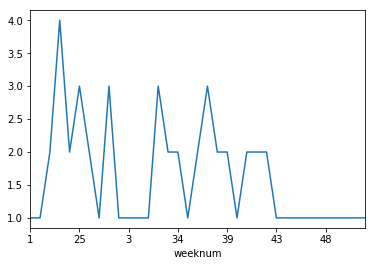

In [61]:
# show duplicates
entries_by_week = df['weeknum'].groupby(df['weeknum']).count()
entries_by_week.plot()

In [62]:
# Reverse sort data by last seen
# most recent row should be presented first
df = df.sort_values(by='last_seen', ascending=False)
len(df)

57

In [13]:
# lastseen = timesort_df.last_seen
# lastseen.head()
# lastseen.plot()

In [63]:
# Filter out duplicates
df_filtered = df.drop_duplicates(['siteid', 'weeknum', 'type'], keep='first')
len(df_filtered)

35

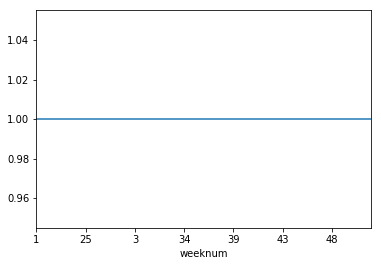

In [65]:
# show duplicates
entries_by_week = df_filtered['weeknum'].groupby(df_filtered['weeknum']).count()
entries_by_week.plot()

In [15]:
df_filtered 

,index,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,...,dcur,dead,defu,dmed,tout,confirm,unique,siteid_lgt,state_num,lga_num
17528,17471,4e09ed3b-3131-4dd0-833d-2f0b6b72e98d,2348088482226,Salihu Bakura.,"Imam Supervision, Imam Supervision 2, Imam Sup...",202110021,2017-02-13 08:02:59,2017-02-13 08:13:24,6,Site,...,2,0,4,0,0,Yes,2348088482226 2017-02-13 08:02:59,9,2,202
22984,22915,cda1e195-a849-4e1b-9f66-798293ca976c,2347035838590,Husaina Lawal.,"Imam Supervision, Imam Supervision 2, Imam Sup...",2026110002,2017-02-13 08:00:22,2017-02-13 08:04:42,6,Site,...,6,0,2,0,0,Yes,2347035838590 2017-02-13 08:00:22,10,20,2026
11926,11886,cd92eb29-1a85-4afd-b013-e974403954da,2348080886398,Alhaji Ali Ibrahim .,"Imam Supervision, Imam Supervision 2, Imam Sup...",3501110009,2017-02-13 07:21:24,2017-02-13 07:24:58,6,Site,...,5,0,0,0,0,Yes,2348080886398 2017-02-13 07:21:24,10,35,3501
30252,30188,81a3879f-cdb7-4a0e-b40a-007aaed2c80a,2348038251840,Yusuf Mohammed.,"Imam Supervision, Imam Supervision 2, Imam Sup...",1818110036,2017-02-13 07:15:27,2017-02-13 07:21:39,6,Site,...,15,0,0,0,0,Yes,2348038251840 2017-02-13 07:15:27,10,18,1818
12180,12139,5851fe65-de0c-477a-b81b-45c70df07cb4,2347010896910,Dayyabu Musa.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3510110005,2017-02-13 06:50:59,2017-02-13 06:59:34,5,Site,...,18,0,0,0,0,Yes,2347010896910 2017-02-13 06:50:59,10,35,3510
27224,27149,91f9d953-34e6-4623-a6e2-639ee1690155,2348032214641,Amina Ibrahim .,"Imam Supervision, Imam Supervision 2, Imam Sup...",2117210008,2017-02-13 06:13:40,2017-02-13 06:17:39,6,Site,...,0.0,0.0,0.0,0.0,0,Yes,2348032214641 2017-02-13 06:13:40,10,21,2117
8788,8752,35965e44-cb4a-4a00-8867-de5ddadb3d2f,2348026197970,Abubakar Idriss Ilyasu.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3504110040,2017-02-13 06:06:11,2017-02-13 06:09:36,6,Site,...,22,0,3,0,1,Yes,2348026197970 2017-02-13 06:06:11,10,35,3504
7583,30639,3981d449-8294-4b46-89ae-5b6e27995d55,2348169372061,LABARAN TANIMU.,"No_Email, Nut Personnel",182311OO29,2017-02-13 06:01:00,2017-02-13 06:08:42,6,Site,...,9,0,0,0,0,Yes,2348169372061 2017-02-13 06:01:00,10,18,1823
9806,9766,db9e7e89-3ce4-4b6e-8f25-c974c6e20d0a,2348162238645,Sadiya Musa .,"Imam Supervision, Imam Supervision 2, Imam Sup...",3503110019,2017-02-12 22:49:49,2017-02-12 22:51:18,5,Site,...,None,None,None,None,None,None,2348162238645 2017-02-12 22:49:49,10,35,3503
6470,6449,3e7b53a8-afab-471b-929a-30a50107e2e2,2348066286112,Ibrahim Bala.,"Imam Supervision, Imam Supervision 2, Imam Sup...",1727110005,2017-02-12 22:35:27,2017-02-12 22:43:09,6,Site,...,14,0,0,0,0,Yes,2348066286112 2017-02-12 22:35:27,10,17,1727


In [34]:
# removing letters from string
# python 2
a = 'Enter your SiteID. This ID was recorded on your form during training and is available from your supervisor. 813110035'

In [11]:
b = filter(lambda x: x.isdigit(), a)
import re
c = re.sub("\D", "", a)

In [26]:
print b, c

813110035 813110035


In [15]:
%timeit b = filter(lambda x: x.isdigit(), a)

10000 loops, best of 3: 23.4 µs per loop


In [16]:
%timeit c = re.sub("\D", "", a)

10000 loops, best of 3: 31 µs per loop


In [30]:
a = 10

In [31]:
try: 
    value = int(a)
    print "int"
except ValueError: 
    print "string"

int


In [35]:
if not value == int(a): 
    print "string"

ValueError: invalid literal for int() with base 10: 'Enter your SiteID. This ID was recorded on your form during training and is available from your supervisor. 813110035'

In [44]:
weeknum = 0
# FIXME - Add weeknum here
if weeknum < 1 or weeknum > 53:
    print '     0 > WEEKNUM > 53 (%s), skip' % (weeknum)

     0 > WEEKNUM > 53 (0), skip


In [46]:
if 0 >= weeknum > 53:
    print '     0 > WEEKNUM > 53 (%s), skip' % (weeknum)
    
# DOES NOT WORK

In [59]:
import datetime, time
last_seen = datetime.datetime(2016, 06, 28, 12, 15, 34)
print '     Monday AM reporting (%s)' % (last_seen.strftime("%d-%m-%Y %H:%M:%S"))

     Monday AM reporting (28-06-2016 12:15:34)


In [62]:
weeknum = 5.0
print '     Week number(%s)' % (int(weeknum))

     Week number(5)
